### Zihan Zhou ID:2106779 Course: Mathematics Year of Study: 3
Objective: identify coefficients $a_0, a_1, \dots, a_d$ of a polynomial function of the form 
$$ y = f(x,a) = \sum_{i=1}^d a_i x^i + \epsilon$$
where $\epsilon$ is a random component that represents the residual error, and $d$ is the degree of the polynomia. Given $n$ data points we can write a linear system of equations
$$ \underbrace{\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}}_{b} = \underbrace{\begin{bmatrix}
1 & x_1 & x_1^2 & \dots & x_1^d \\
1 & x_2 & x_2^2 & \dots & x_2^d \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^d \\
\end{bmatrix}}_V \underbrace{\begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_d \end{bmatrix}}_a$$
$V$ is called a Vandermonde matrix.$V \in \mathbb R^{n \times (d+1)}$ 

**(a) Numerically analyse the invertibility of the Vandermonde matrix**

In [1]:
import numpy as np
from numpy import linalg as LA
import scipy
from scipy.linalg import lu
import matplotlib.pyplot as plt
import time
from numpy import random
import math
import pandas as pd
from numpy.linalg import inv

In [2]:
def Vandermonde(x,d):
    x = np.array(x)
    n = len(x)
    V = np.zeros((n,d+1))
    for i in range(n):
        for j in range(d+1):
            V[i, j] = x[i]**j
            

    return V


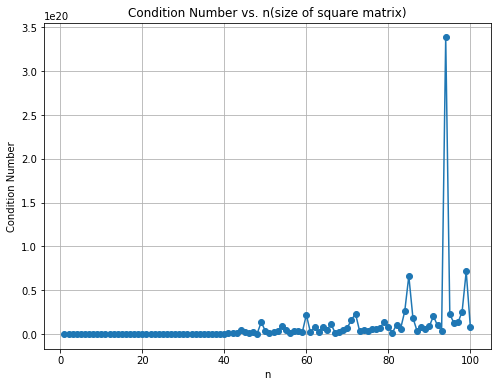

,n,Condition Number
0,10.0,4.626450e+03
1,20.0,2.722408e+08
2,30.0,1.838552e+13
3,40.0,1.116334e+17
4,50.0,3.421517e+18
5,60.0,2.189986e+19
6,70.0,7.293289e+18
7,80.0,8.294607e+18
8,90.0,8.743929e+18
9,100.0,8.481653e+18


In [3]:
kappa = np.zeros(100)
ns = np.zeros(100)
for i in range(100):
    n = i+1
    ns[i] = n
    x = np.linspace(-1, 1, n)        
    V = Vandermonde(x, n-1)
    kappa[i] = np.linalg.cond(V)
    #print("n = ", n, ", Conditional number = ", kappa[i])

plt.figure(figsize = (8,6))
plt.plot(ns, kappa, marker = 'o')
plt.xlabel("n")
plt.ylabel("Condition Number")
plt.title("Condition Number vs. n(size of square matrix)")
plt.grid(True)
plt.show()


ns_rep = [ns[10*i-1] for i in range(1,11)]
kappa_rep = [kappa[10*i -1] for i in range(1,11)]
cond = {
  "n": ns_rep,
  "Condition Number": kappa_rep
}

#load data into a DataFrame object:
conds = pd.DataFrame(cond)

display(conds)

**(b)** Assuming $d = 3$, $n = 5$, then $V \in \mathbb R^{5 \times 4},\; a \in \mathbb R^{4}$. The least square solution for the identification of the polynomial coefficients consists of minimising the function
$$ g: \mathbb R^4 \rightarrow \mathbb R, \quad g(a) = \frac{1}{2} \| Va - b\|_2^2$$.  
$a$ solves the problem if and only if 
$$ V^T V a = V^T b$$

**(c)** Predict the humidity based on pressure measurements.  
i. Plot the humidity measurements against their pressure measurements.

In [4]:
WeatherData = pd.read_csv("WeatherData.csv") 
WeatherData90 = WeatherData.iloc[1:91]
WD = WeatherData90.to_numpy()
pres = WD[:,0]
hum = WD[:,1]
p = pres.argsort()
pres = pres[p]
hum = hum[p]

In [5]:
WD = WeatherData90.to_numpy()

print("Minimum pressure:", min(pres))
print("Maximum pressure:", max(pres))
print("Minimum humidity:", min(hum))
print("Maximum humidity:", max(hum))

Minimum pressure: 1000.72
Maximum pressure: 1019.0
Minimum humidity: -0.03
Maximum humidity: 0.93


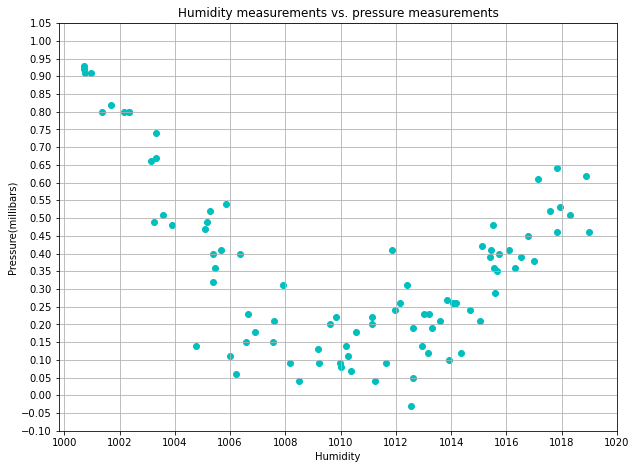

In [17]:
plt.figure(figsize = (10,7.5))
plt.scatter(pres,hum, marker = 'o',color = 'c')
plt.xticks(np.arange(1000, 1021.5, 2.0))
plt.yticks(np.arange(-0.1, 1.09, 0.05))
plt.title('Humidity measurements vs. pressure measurements')
plt.xlabel('Humidity')
plt.ylabel('Pressure(millibars)')
plt.grid(True)
plt.show()

ii. Starting from $d = 0$ to $d = 5$ to identify the coefficients of the 6 polynomial models and state their values.


d =  0 , Coefficients =  [0.357]
d =  1 , Coefficients =  [ 1.74167443e+01 -1.68869440e-02]
d =  2 , Coefficients =  [ 8.14134464e+03 -1.61089024e+01  7.96862164e-03]
d =  3 , Coefficients =  [ 1.22258577e+05 -3.55164962e+02  3.43755285e-01 -1.10847788e-04]
d =  4 , Coefficients =  [ 1.43163470e+05 -4.36298915e+02  4.61786435e-01 -1.87127370e-04
  1.84774921e-08]
d =  5 , Coefficients =  [ 2.47750918e+04  6.81329186e+00 -1.01688336e-01  2.93265183e-05
  9.54938856e-08 -5.47193267e-11]


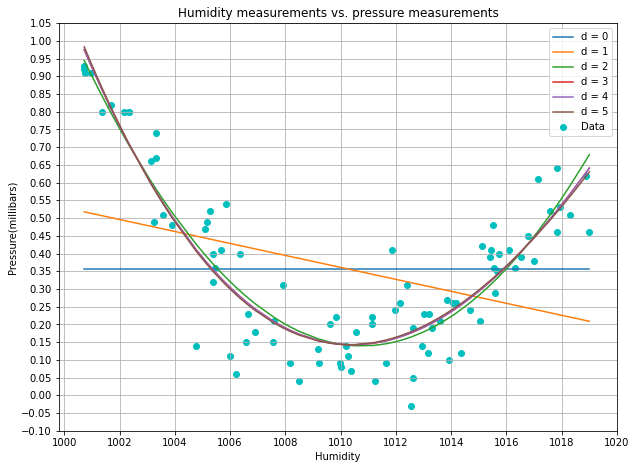

In [18]:
coff = np.zeros([6,6])
poly = np.zeros([6, 90])
for d in range(6):
    V = Vandermonde(pres,d)
    
    # QR Decomposition
    #Q, R = np.linalg.qr(V, mode = 'reduced')
    #y = Q.T@hum
    #a = np.linalg.solve(R, y)
    
    # Solve
    a = np.linalg.solve(V.T@V, V.T@hum)
    
    # LU Factorisation
    #P, L, U = scipy.linalg.lu(np.transpose(V)@V)
    #y = scipy.linalg.solve(L,P@np.transpose(V)@hum)
    #a = scipy.linalg.solve(U,y)
    
    # LSTSQ
    #a,res, rnk, s  = scipy.linalg.lstsq(V, hum)
    
    # Inverse
    #a = scipy.linalg.inv(np.transpose(V)@V)@np.transpose(V)@hum
    
    coff[d, 0:(d+1)] = a
    print("d = ", d, ", Coefficients = ", a)
    poly[d] = V@a
    
    
    
plt.figure(figsize = (10,7.5))
plt.scatter(pres,hum, marker = 'o', label = "Data", color = 'c')
plt.plot(pres, poly[0],  label = "d = 0")
plt.plot(pres, poly[1],  label = "d = 1")
plt.plot(pres, poly[2],  label = "d = 2")
plt.plot(pres, poly[3],  label = "d = 3")
plt.plot(pres, poly[4],  label = "d = 4")
plt.plot(pres, poly[5],  label = "d = 5")
plt.xticks(np.arange(1000, 1021.5, 2.0))
plt.yticks(np.arange(-0.1, 1.09, 0.05))
plt.title('Humidity measurements vs. pressure measurements')
plt.xlabel('Humidity')
plt.ylabel('Pressure(millibars)')
plt.grid(True)
plt.legend()
plt.show()

iii. Compute relative forward errors of the polynomial models.  
Relative forward erros is given by 
$$ \frac{\| y - Va\|}{\| y\|}$$

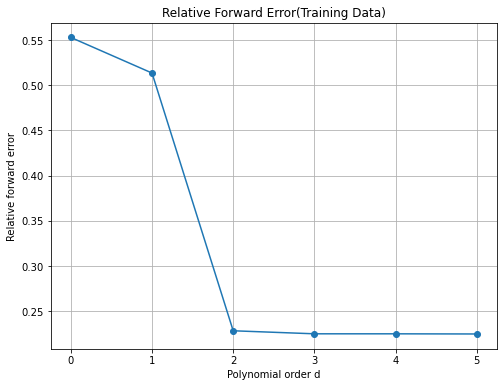

,d,Relative forward error
0,0,0.552866
1,1,0.513509
2,2,0.228502
3,3,0.225151
4,4,0.225141
5,5,0.224965


In [8]:
rel_err = np.zeros(6)
for d in range(6):
    rel_err[d] = np.linalg.norm(hum - poly[d])/ np.linalg.norm(hum)

plt.figure(figsize = (8,6))
plt.plot(np.array([0,1,2,3,4,5]), rel_err, marker = 'o')
plt.xlabel('Polynomial order d')
plt.ylabel('Relative forward error')
plt.grid(True)
plt.title("Relative Forward Error(Training Data)")
plt.show()

data = {
  "d": np.array([0,1,2,3,4,5]),
  "Relative forward error": rel_err
}

#load data into a DataFrame object:
err = pd.DataFrame(data)

display(err)

iv. Compute relative error on the test data(everything beyond day 90).

,Pressure (millibars),Humidity
91,1016.78,0.49
92,1000.71,0.88
93,1002.43,0.86
94,1017.82,0.42
95,1010.30,0.16
96,1018.49,0.81
97,1011.62,0.12
98,1015.47,0.34
99,1008.45,0.20


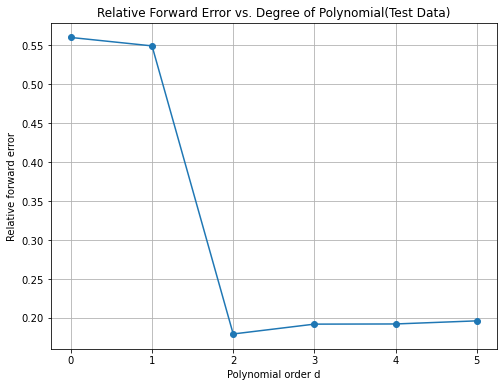

,d,Relative forward error
0,0,0.560264
1,1,0.549446
2,2,0.179328
3,3,0.191973
4,4,0.192186
5,5,0.196173


In [9]:
WeatherData_test = WeatherData.iloc[91:]
display(WeatherData_test)
WD_test = WeatherData_test.to_numpy()

rel_err = np.zeros(6)
for d in range(6):
    V = Vandermonde(WD_test[:,0],d)
    a = coff[d, 0:(d+1)]
    rel_err[d] = np.linalg.norm(WD_test[:,1] - V@a)/ np.linalg.norm(WD_test[:,1])

plt.figure(figsize = (8,6))
plt.plot(np.array([0,1,2,3,4,5]), rel_err, marker = 'o')
plt.xlabel('Polynomial order d')
plt.ylabel('Relative forward error')
plt.grid(True)
plt.title("Relative Forward Error vs. Degree of Polynomial(Test Data)")
plt.show()

data2 = {
  "d": np.array([0,1,2,3,4,5]),
  "Relative forward error": rel_err
}

#load data into a DataFrame object:
err2 = pd.DataFrame(data2)

display(err2)

v. According to the plot in iii., the relative forward error at its minimum when $d = 5$, but errors at $d = 2,3,4, 5$ are all very close. The graph in iv shows that the relative forward error is the msalThus, the optimal order of polynomial that fits the data is $d = 2$.  where the relative forward error for the test data is still the smallest at $d = 2$, suggesting that this order of polynomial is generally accurate.

vi. Best estimates for the last five days calculated by my beset polynomial model.

,Day,Actual Humidity,Estimated Humidity
0,96,0.16,0.141193
1,97,0.81,0.614227
2,98,0.12,0.145170
3,99,0.34,0.315382
4,100,0.20,0.182351


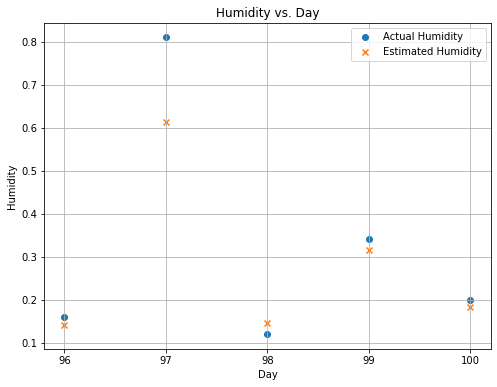

In [14]:
rel_err = np.zeros(5)
V = Vandermonde(WD_test[-5: ,0],2)
a = coff[2, 0:3]
est = V@a
data3 = {
  "Day": np.array([96,97,98,99,100]),
  "Actual Humidity": WD_test[-5:, 1],
    "Estimated Humidity": est
}

#load data into a DataFrame object:
hum3 = pd.DataFrame(data3)

display(hum3)
plt.figure(figsize= (8,6))
plt.scatter(np.array([96,97,98,99,100]), WD_test[-5:, 1], marker = 'o', label = "Actual Humidity")
plt.scatter(np.array([96,97,98,99,100]), est, marker = 'x', label = "Estimated Humidity")
plt.xticks(np.arange(96, 100.8, 1))
plt.xlabel('Day')
plt.ylabel('Humidity')
plt.title("Humidity vs. Day")
plt.grid(True)
plt.legend()
plt.show()

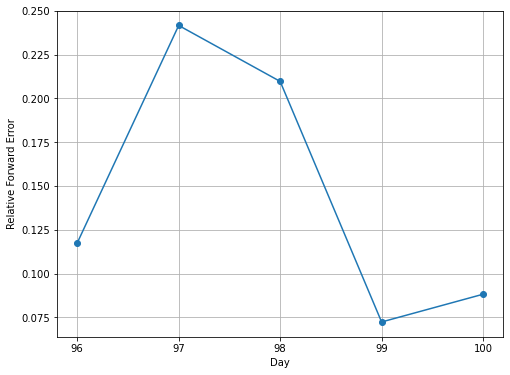

In [15]:
last_five = WD_test[-5: ,1]
for i in range(5):
    rel_err[i] = np.abs(last_five[i] - est[i])/np.abs(last_five[i])

plt.figure(figsize = (8,6))
plt.plot(np.array([96,97,98,99,100]), rel_err, marker = 'o')
plt.xlabel('Day')
plt.ylabel('Relative Forward Error')
plt.xticks(np.arange(96, 100.8, 1))
plt.grid(True)
plt.show()

According to the plot above, day 99 has the best estimate, as it has the smallets relative forward error.